<a href="https://colab.research.google.com/github/sakira/TensorflowInPractice/blob/master/DNN_in_tensorflow_Course_1_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate\
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2019-12-06 08:19:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  67.9MB/s    in 2.1s    

2019-12-06 08:19:33 (67.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate\
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
  -O /tmp/validation-horse-or-human.zip

--2019-12-06 08:19:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  32.3MB/s    in 0.3s    

2019-12-06 08:19:41 (32.3 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with training horse images
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with training human images
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with validation horse images
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with validation human images
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse41-5.png', 'horse33-3.png', 'horse11-4.png', 'horse06-3.png', 'horse33-7.png', 'horse33-6.png', 'horse46-3.png', 'horse16-7.png', 'horse16-9.png', 'horse24-4.png']
['human01-16.png', 'human04-16.png', 'human15-29.png', 'human07-02.png', 'human02-13.png', 'human08-29.png', 'human07-05.png', 'human02-30.png', 'human15-18.png', 'human06-23.png']
['horse4-588.png', 'horse6-345.png', 'horse5-405.png', 'horse3-055.png', 'horse5-402.png', 'horse1-510.png', 'horse2-383.png', 'horse6-161.png', 'horse5-275.png', 'horse1-204.png']
['valhuman03-03.png', 'valhuman05-23.png', 'valhuman03-08.png', 'valhuman05-07.png', 'valhuman03-11.png', 'valhuman03-05.png', 'valhuman05-06.png', 'valhuman04-07.png', 'valhuman04-14.png', 'valhuman01-14.png']


In [8]:
print('Total training horse images: {}'.format(len(os.listdir(train_horse_dir))))
print('Total training human images: {}'.format(len(os.listdir(train_human_dir))))

print('Total validation horse images: {}'.format(len(os.listdir(validation_horse_dir))))
print('Total validation human images: {}'.format(len(os.listdir(validation_human_dir))))

Total training horse images: 500
Total training human images: 527
Total validation horse images: 128
Total validation human images: 128


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for graph
nrows = 4
ncols = 4


# index for iterting over images
pic_index = 0


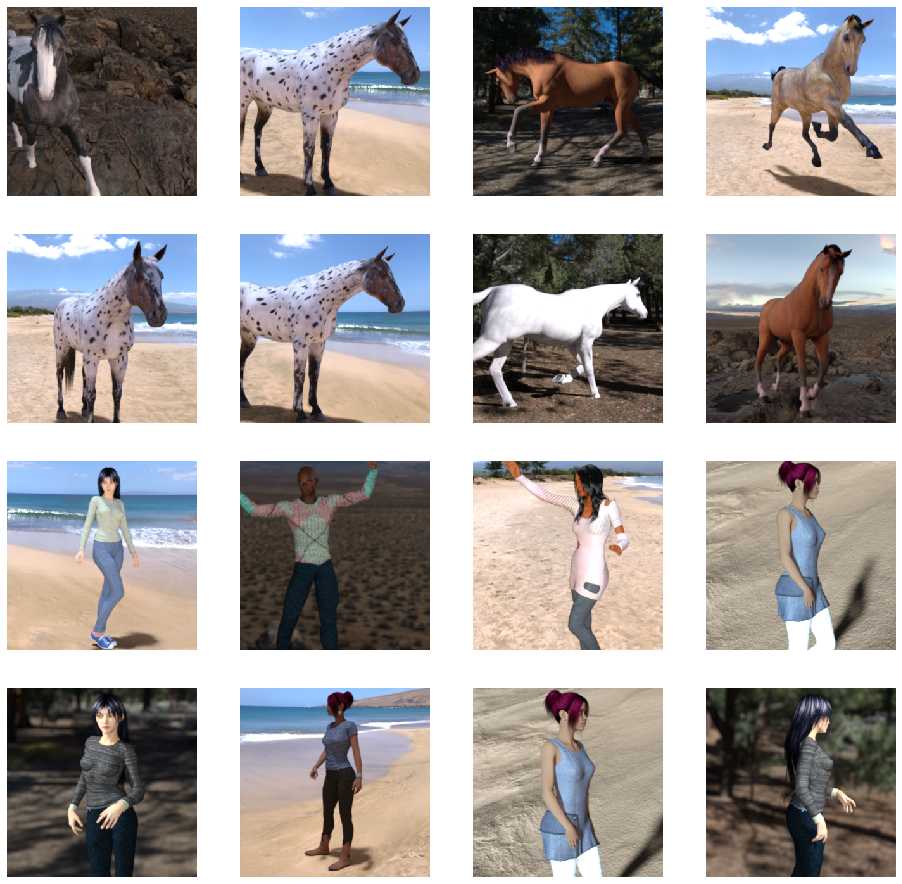

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Image generator

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
ls /tmp/

horse-or-human/     validation-horse-or-human/
horse-or-human.zip  validation-horse-or-human.zip


In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_dir = '/tmp/horse-or-human/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

# validation_datagen = ImageDataGenerator(rescale=1./255)
# valid_dir = '/tmp/validation-horse-or-human'
# validation_generator = validation_datagen.flow_from_directory(
#     valid_dir,
#     target_size=(300, 300),
#     batch_size=128,
#     class_mode='binary'
# )

Found 1027 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_dir = '/tmp/validation-horse-or-human'
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
                                    # 3 sets of conv and pooling layers
                                    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    # dense layers
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________

## Training the convNet with fit_generator

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['acc']
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 8s 971ms/step - loss: 0.9727 - acc: 0.6952 - val_loss: 0.5344 - val_acc: 0.7852
Epoch 2/15
8/8 [==============================] - 8s 963ms/step - loss: 0.3700 - acc: 0.8594 - val_loss: 1.3423 - val_acc: 0.7656
Epoch 3/15
8/8 [==============================] - 6s 802ms/step - loss: 0.3120 - acc: 0.8953 - val_loss: 0.7221 - val_acc: 0.8516
Epoch 4/15
8/8 [==============================] - 7s 933ms/step - loss: 0.1656 - acc: 0.9375 - val_loss: 2.0692 - val_acc: 0.6562
Epoch 5/15
8/8 [==============================] - 6s 740ms/step - loss: 0.2485 - acc: 0.8863 - val_loss: 6.3669 - val_acc: 0.6367
Epoch 6/15
8/8 [==============================] - 7s 933ms/step - loss: 0.2730 - acc: 0.9199 - val_loss: 0.8876 - val_acc: 0.8750
Epoch 7/15
8/8 [==============================] - 7s 849ms/step - loss: 0.2013 - acc: 0.9244 - val_loss: 0.6744 - val_acc: 0.8125
Epoch 8/15
8/8 [==============================] - 7s 835ms/step - loss: 0.1182 - acc: 0.95

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [22]:
uploaded = files.upload()

Saving girl-3551832_640.jpg to girl-3551832_640.jpg
Saving white-horse-3010129_640.jpg to white-horse-3010129_640.jpg
Saving worried-girl-413690_640.jpg to worried-girl-413690_640.jpg


In [23]:
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')

[0.]
girl-3551832_640.jpg is a horse
[0.]
white-horse-3010129_640.jpg is a horse
[1.]
worried-girl-413690_640.jpg is a human


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


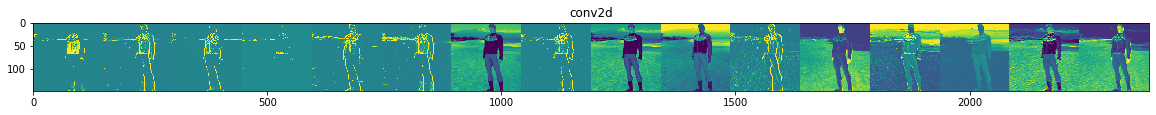

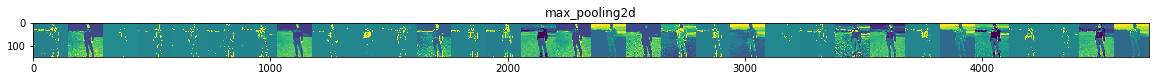

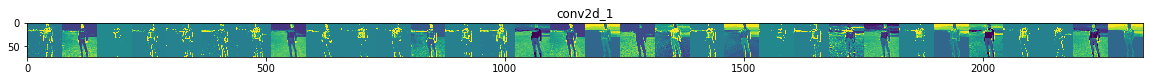

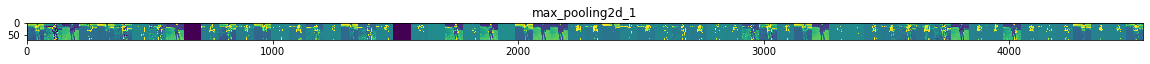

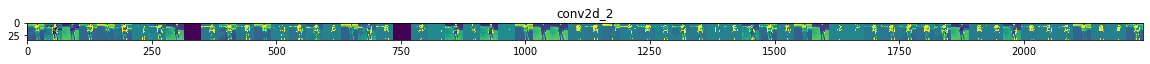

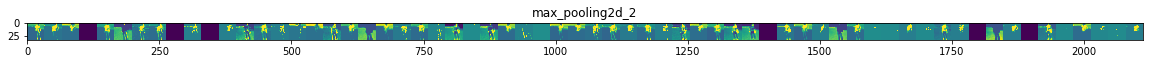

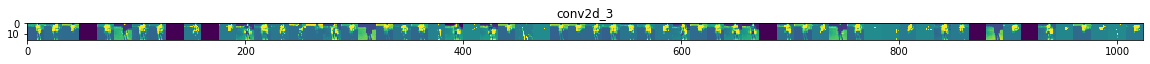

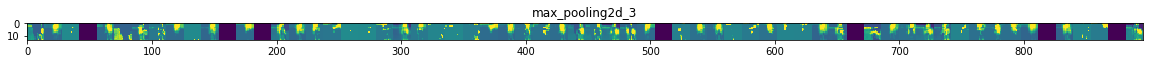

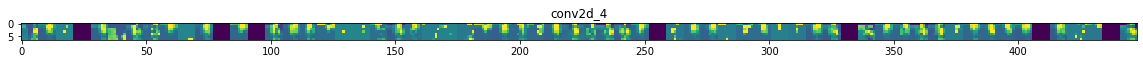

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]


img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1, ) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if(len(feature_map.shape) == 4):
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i*size: (i+1) * size] = x
    scale = 20 / n_features
    plt.figure(figsize=(scale*n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')




In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)